In [4]:
import numpy as np
import qutip as qp
import matplotlib.pyplot as plt

In [132]:
nmax = 10; # number of the particle of state
n0 = 1;
hbar = 6.626*(10**-34)*(10**3)*(10**12)/(2*np.pi*1.6*10**-19); # Planck constant  [meV*ps]
kB = 8.617*10**-2; # Boltzmann Constant [meV/K]

TTP = 10;
T = [0.1, 1, 10, 20]; #[k]

gamma = 100; # lifetime of the particle of state [ps]
Gamma = gamma**-1;
EN = [1,2]; # Energy of the state [meV]

Ad= qp.destroy(nmax+1); # Destruction operator of state
IdN = qp.qeye(nmax+1); # Identity matrix 

A =[];
for i in range(2):
    operator_lop =[];
    for j in range(2):
        if i ==j:
            operator_lop.append(Ad);
        else:
            operator_lop.append(IdN);
            
    operator_i = qp.tensor(operator_lop);
    A.append(operator_i);

N  = [A[k].dag()*A[k] for k in range(2)]; # operator of number of particle

H0 = sum(EN[k]*N[k]/hbar for k in range(2)); # Hamiltonian 0

def bose(E,T):
        return (np.exp(E/(kB*T))-1)**-1; # define the bose

     
tlist = np.linspace(0,200,2001);

# Define the initial state
psi_temp = [];
for i in range(2):
    temp = qp.fock_dm(nmax+1,1);
    psi_temp.append(temp);
psi0 = qp.tensor(psi_temp);  # Initial state
    


n = []    
G2_A = []
G2_B = []
for TT in T:
    J_1 = [np.sqrt(Gamma*(bose(EN[k],TT)+1))*A[k] for k in range(2)];
    J_2 = [np.sqrt(Gamma*(bose(EN[k],TT)))*A[k].dag() for k in range(2)];
    
    J_U_PH = [ np.sqrt(Gamma*bose(EN[i+1]-EN[i],TT))*A[i+1].dag()*A[i] for i in range(1)];
    J_D_PH = [ np.sqrt(Gamma*(bose(EN[i+1]-EN[i],TT)+1))*A[i+1]*A[i].dag() for i in range(1)];
    

    J_o =  J_U_PH + J_D_PH;#J_1 + J_2 +
    data = qp.mesolve(H0,psi0,tlist,J_o,N);
    n.append(data.expect)
    G2_1 = qp.correlation_3op_1t(H0,psi0,tlist,J_o,A[0].dag(),A[0].dag()*A[0],A[0],solver='me');
    G2_1 = np.real(G2_1)/(data.expect[0][0]*data.expect[0]);   
    G2_2 = qp.correlation_3op_1t(H0,psi0,tlist,J_o,A[1].dag(),A[1].dag()*A[1],A[1],solver='me');
    G2_2 = np.real(G2_2)/(data.expect[1][0]*data.expect[1]);   
    G2_A.append(G2_1);
    G2_B.append(G2_2)
    

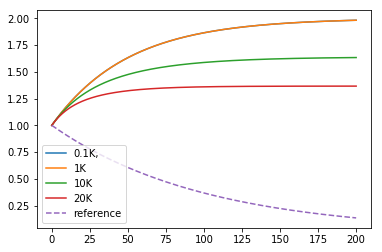

In [133]:
plt.plot(tlist,n[0][0],label='0.1K,');
plt.plot(tlist,n[1][0],label='1K');
plt.plot(tlist,n[2][0],label='10K');
plt.plot(tlist,n[3][0],label='20K');
plt.plot(tlist,n0*np.exp(-tlist/gamma),label='reference',linestyle='dashed')
plt.legend(loc='best')

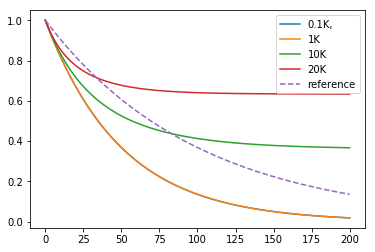

In [134]:
plt.plot(tlist,n[0][1],label='0.1K,');
plt.plot(tlist,n[1][1],label='1K');
plt.plot(tlist,n[2][1],label='10K');
plt.plot(tlist,n[3][1],label='20K');
plt.plot(tlist,n0*np.exp(-tlist/gamma),label='reference',linestyle='dashed')
plt.legend(loc='best')

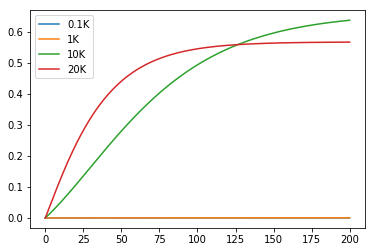

In [135]:
plt.plot(tlist,G2_B[0],label='0.1K');
plt.plot(tlist,G2_B[1],label='1K');
plt.plot(tlist,G2_B[2],label='10K');
plt.plot(tlist,G2_B[3],label='20K');
plt.legend(loc='best')

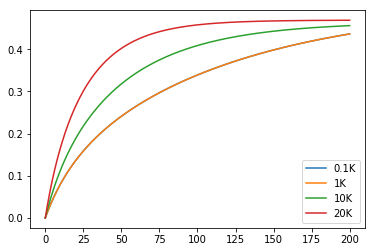

In [136]:
plt.plot(tlist,G2_A[0],label='0.1K');
plt.plot(tlist,G2_A[1],label='1K');
plt.plot(tlist,G2_A[2],label='10K');
plt.plot(tlist,G2_A[3],label='20K');
plt.legend(loc='best')